# How to run a reference design

In this example, we will demonstrate how to setup and run one of the reference designs. We will also show how to explore outputs and generate plots.

### Import required modules

We begin by importing the necessary modules.


In [1]:
from greenheart.simulation.greenheart_simulation import GreenHeartSimulationConfig
from greenheart.tools.optimization.gc_run_greenheart import run_greenheart
from greenheart.tools.plot import plot_energy_flows, plot_hydrogen_flows

/home/cbay/ReferenceHybridSystemDesigns/examples/log/hybrid_systems_2025-03-24T04.15.33.514148.log


### Load inputs and configure the simulation

Next we will configure the H2Integrate simulation by loading individual yaml input files and combining the necessary config definitions and variable options into one `config` variable to run H2Integrate.

In [2]:
filename_turbine_config = "../reference_systems/01-minnesota-steel/greenHEART/input-files/turbines/ATB2024_6MW_170RD_floris_turbine.yaml"
filename_floris_config = "../reference_systems/01-minnesota-steel/greenHEART/input-files/floris/floris_input_lbw_6MW.yaml"
filename_hopp_config = "../reference_systems/01-minnesota-steel/greenHEART/input-files/plant/hopp_config_mn.yaml"
filename_greenheart_config = "../reference_systems/01-minnesota-steel/greenHEART/input-files/plant/greenheart_config_onshore_mn.yaml"

config = GreenHeartSimulationConfig(
    filename_hopp_config,
    filename_greenheart_config,
    filename_turbine_config,
    filename_floris_config,
    verbose=True,
    show_plots=False,
    save_plots=True,
    use_profast=True,
    post_processing=True,
    incentive_option=1,
    plant_design_scenario=1,
    output_level=8,
    save_greenheart_output=True,
)

FileNotFoundError: [Errno 2] No such file or directory: '../reference-systems/01-minnesota-steel/greenHEART/input-files/turbines/ATB2024_6MW_170RD_floris_turbine.yaml'

### Run the H2Integrate simulation

Now we will pass the config to H2Integrate and run the reference plant.

/home/cbay/anaconda3/envs/refdesign/lib/python3.11/site-packages/openmdao/core/driver.py:769: OpenMDAOWarning:Driver: No matches for pattern '*_df' in recording_options['excludes'].


FLORIS is the system model...

Plotting Wind Resource


Simulating wind farm output in FLORIS...

HOPP Results
Hybrid Annual Energy: {"pv": 1254836132.6456678, "wind": 3258737721.4294705, "battery": -2139814.7804178623, "hybrid": 4511434039.2947235}
Capacity factors: {"pv": 23.277496752844865, "wind": 40.00021752626148, "battery": 0, "hybrid": 31.148462431074197}
Real LCOE from HOPP: {"pv": 6.495237475467832, "wind": 3.400192463459412, "battery": 17.38807145409198, "hybrid": 4.440876847593173}
Took 0.045 sec to run the create clusters
Took 0.032 sec to run even_split_power function
Took 0.484 sec to run the RUN function

Electrolyzer Physics:
H2 Produced Annually (metric tons):  71370.83441687761
Max H2 hourly (metric tons):  13.18425169441212
Max H2 daily (metric tons):  316.3691293480522
Energy to electrolyzer (kWh):  4511313802.768745
Energy per kg (kWh/kg):  59.839464516920735
Max hourly based on est kg/kWh (kg):  26509.75699921389
Max daily rough est (metric tons):  475.5649770424

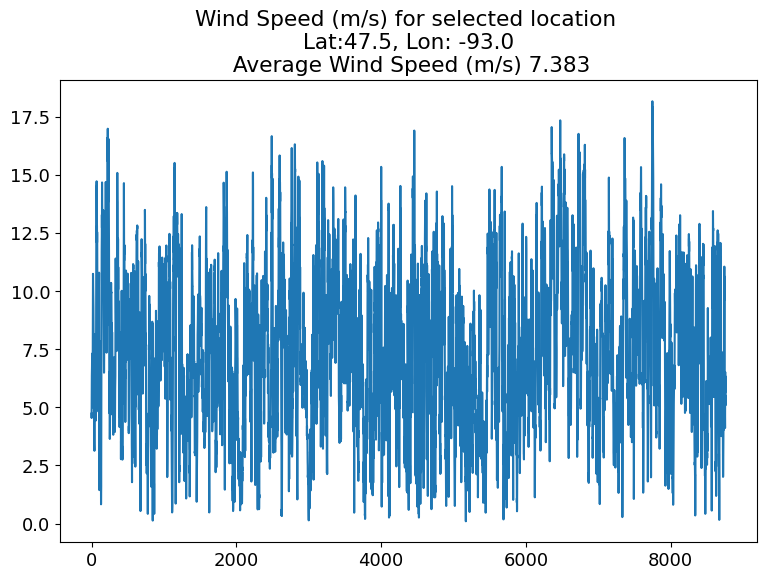

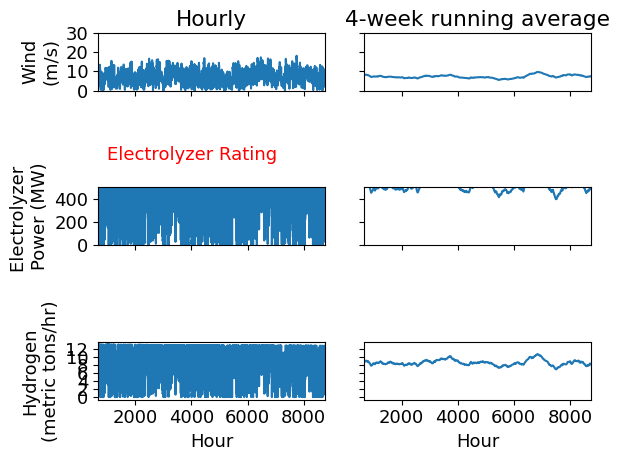

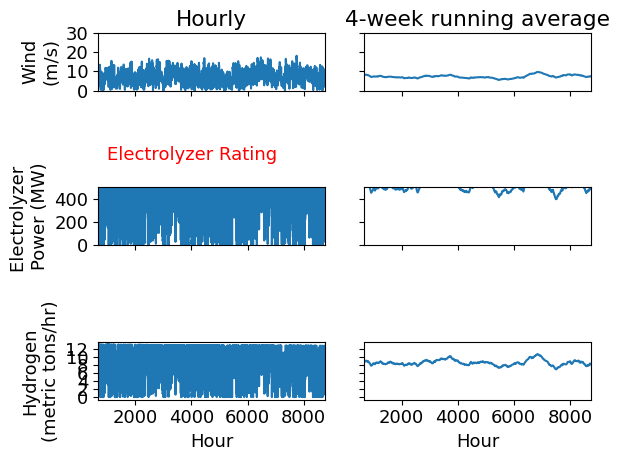

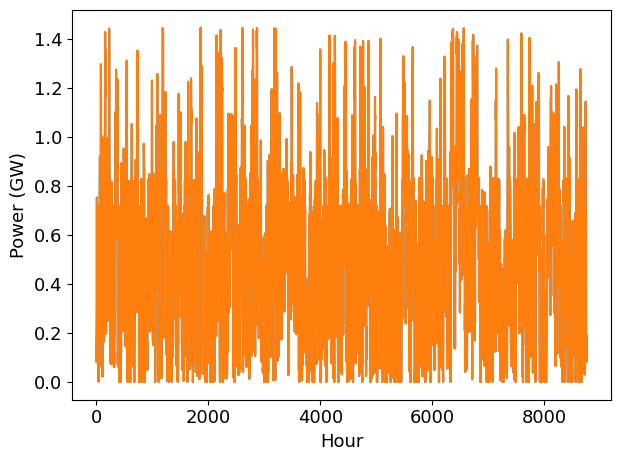

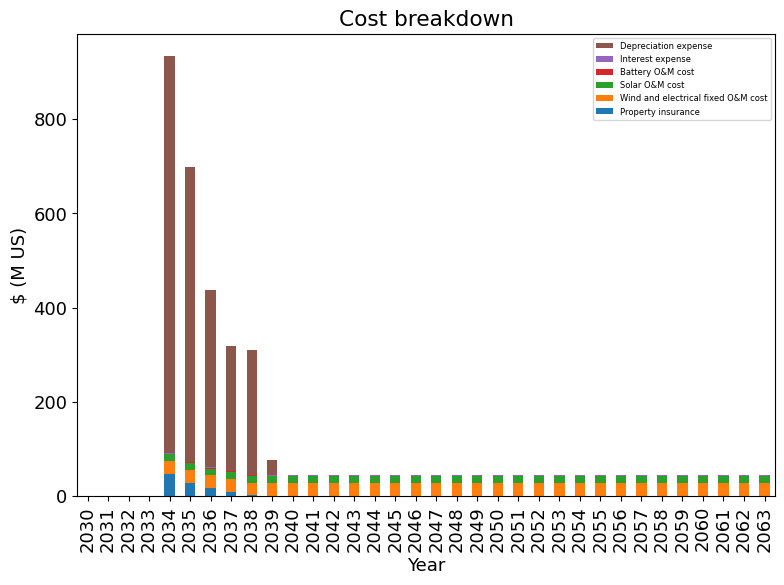

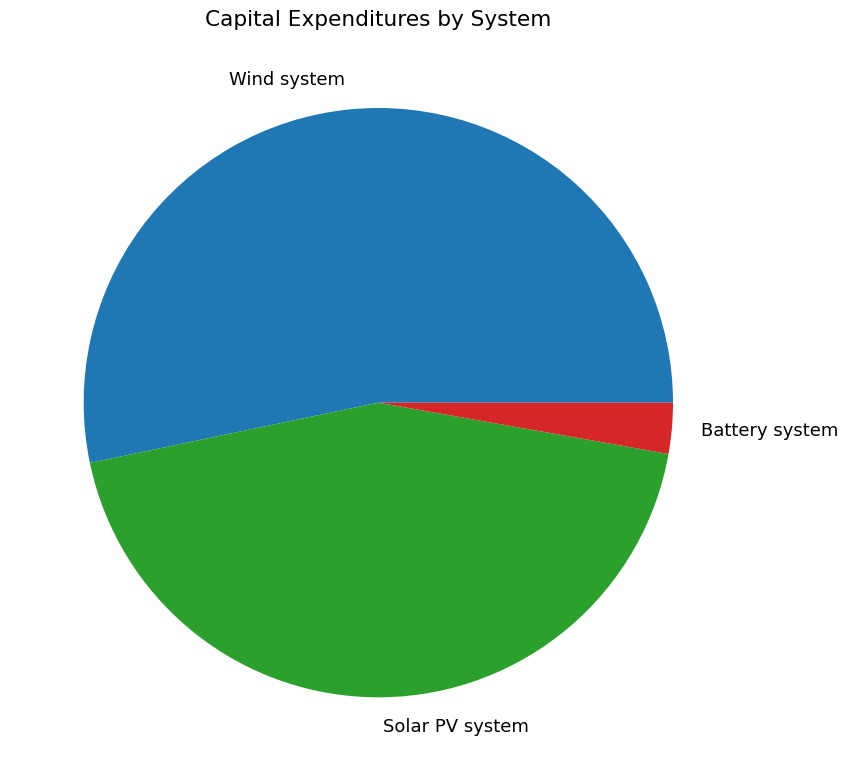

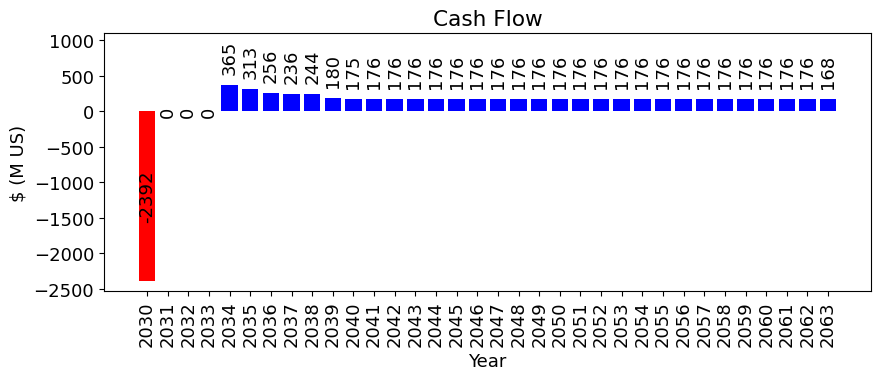

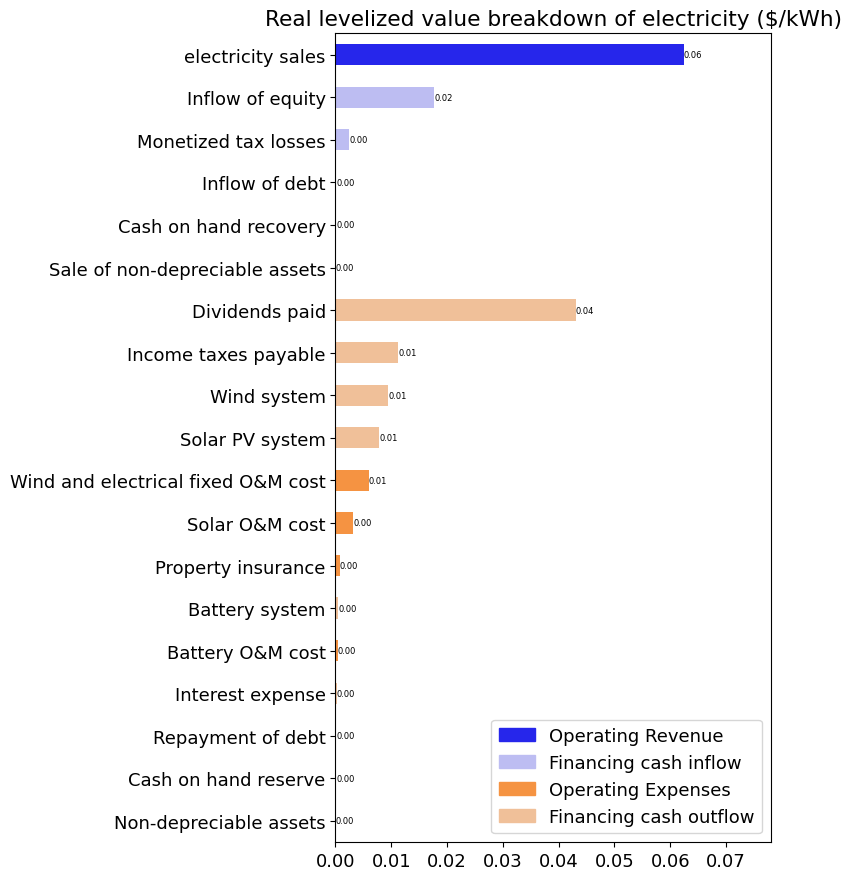

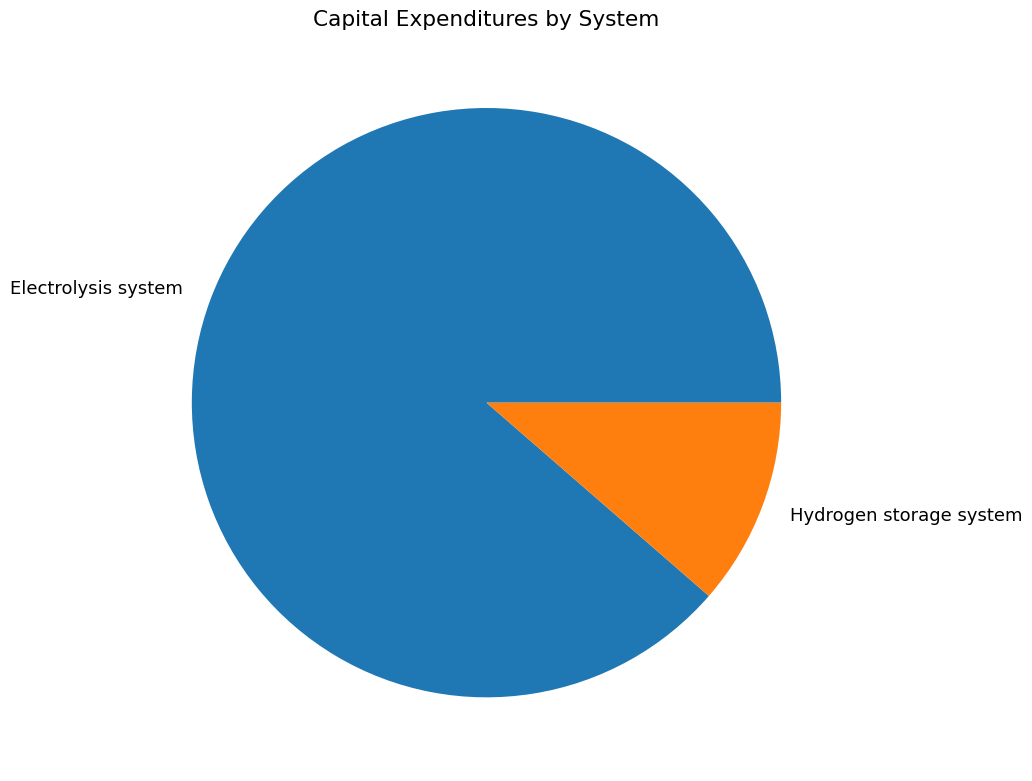

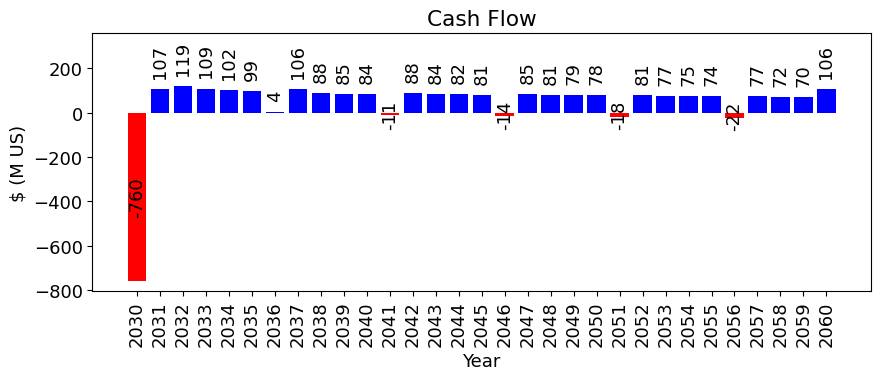

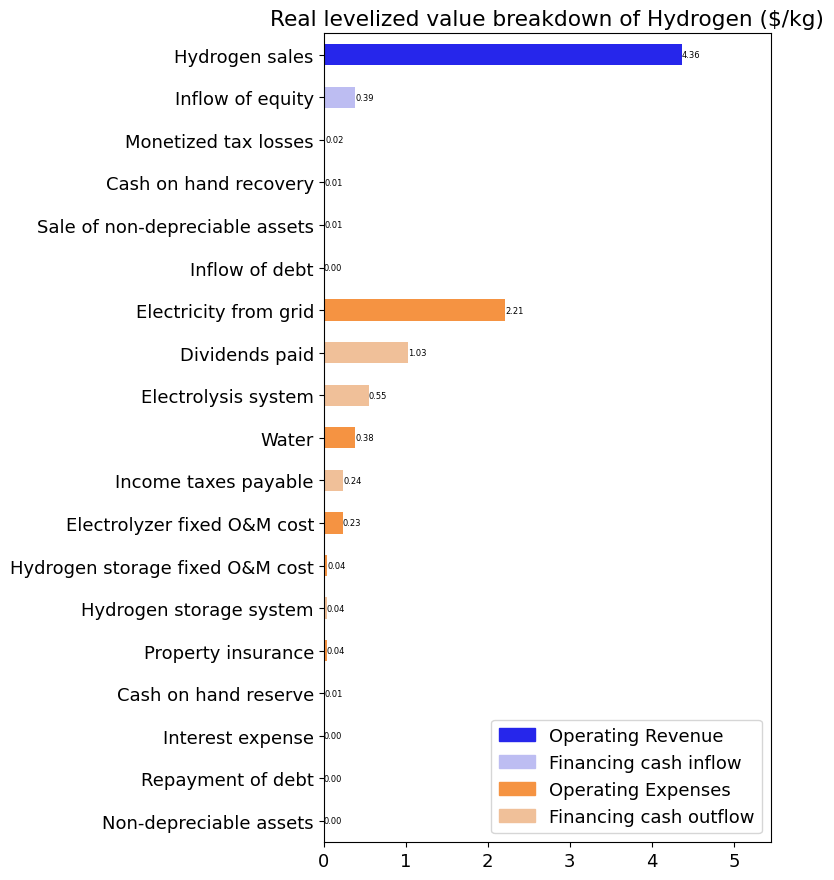

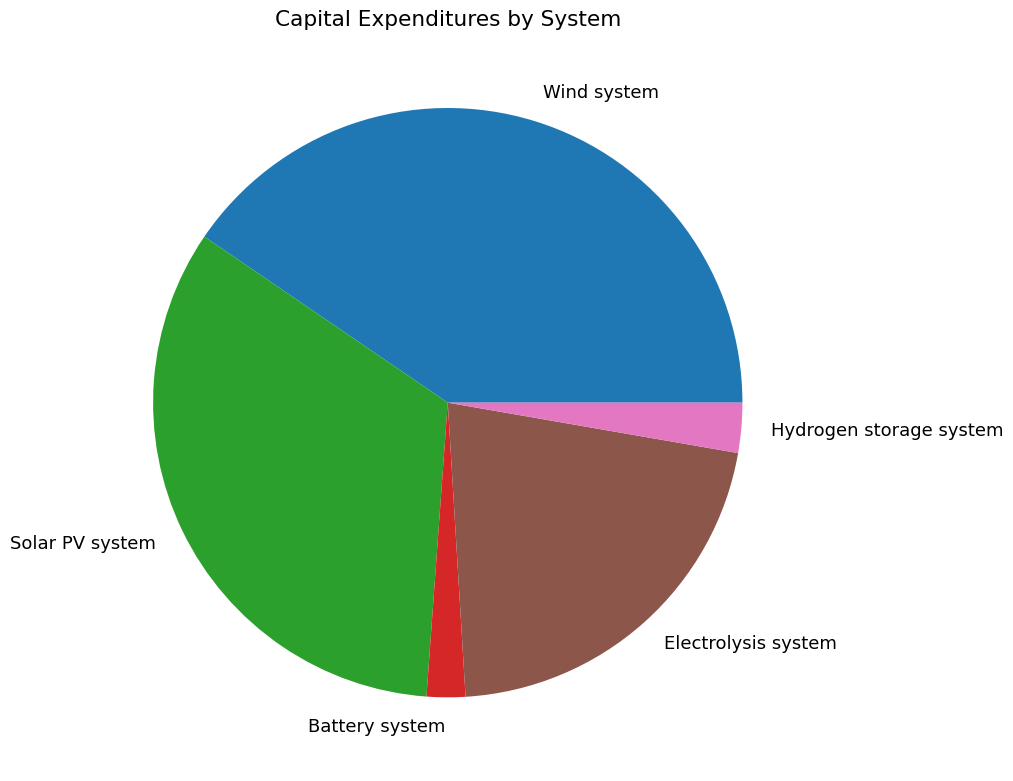

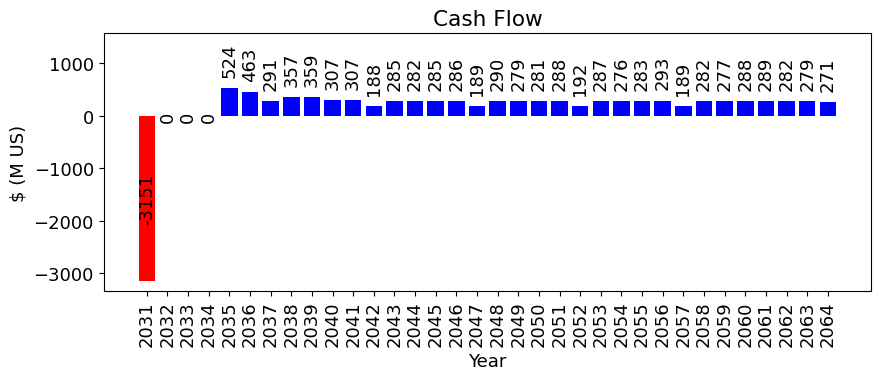

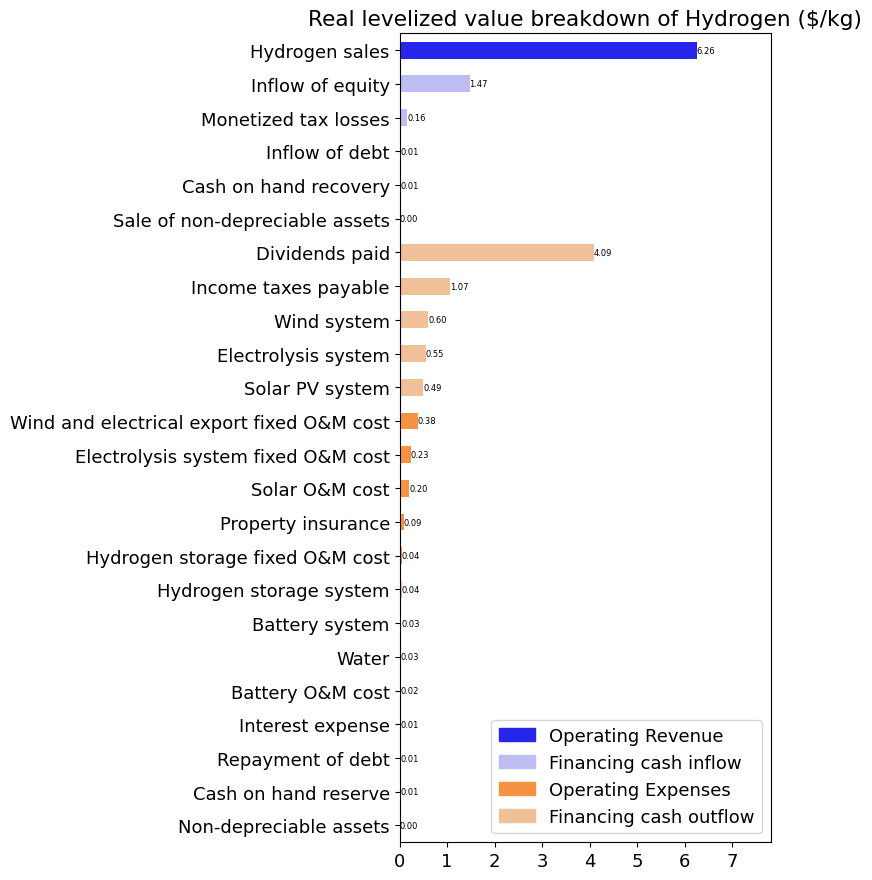

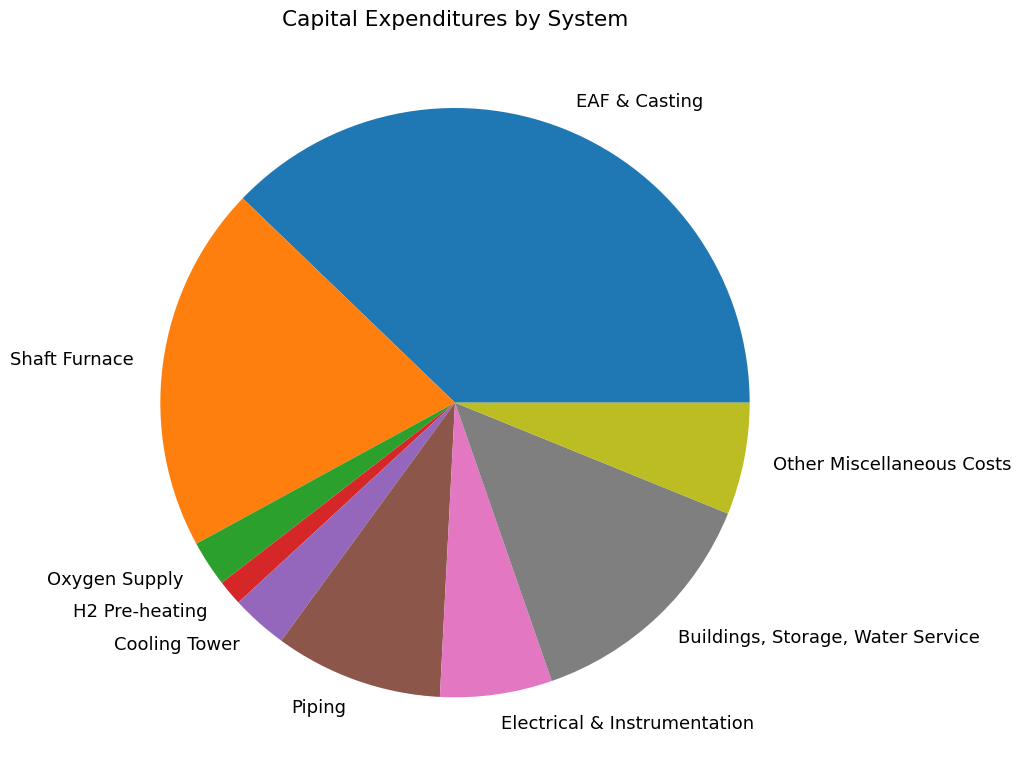

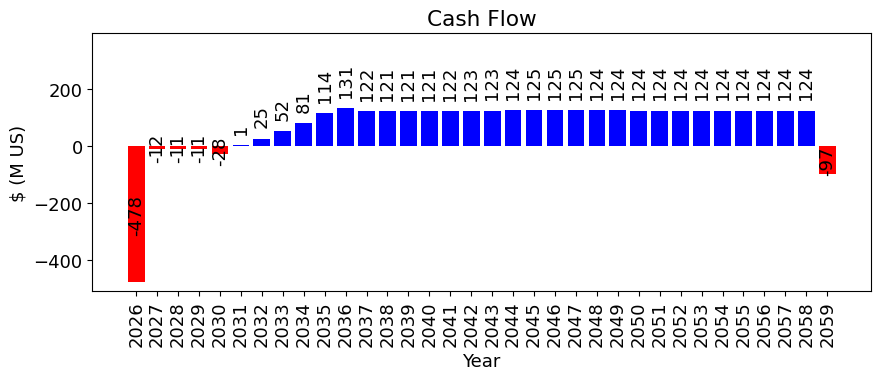

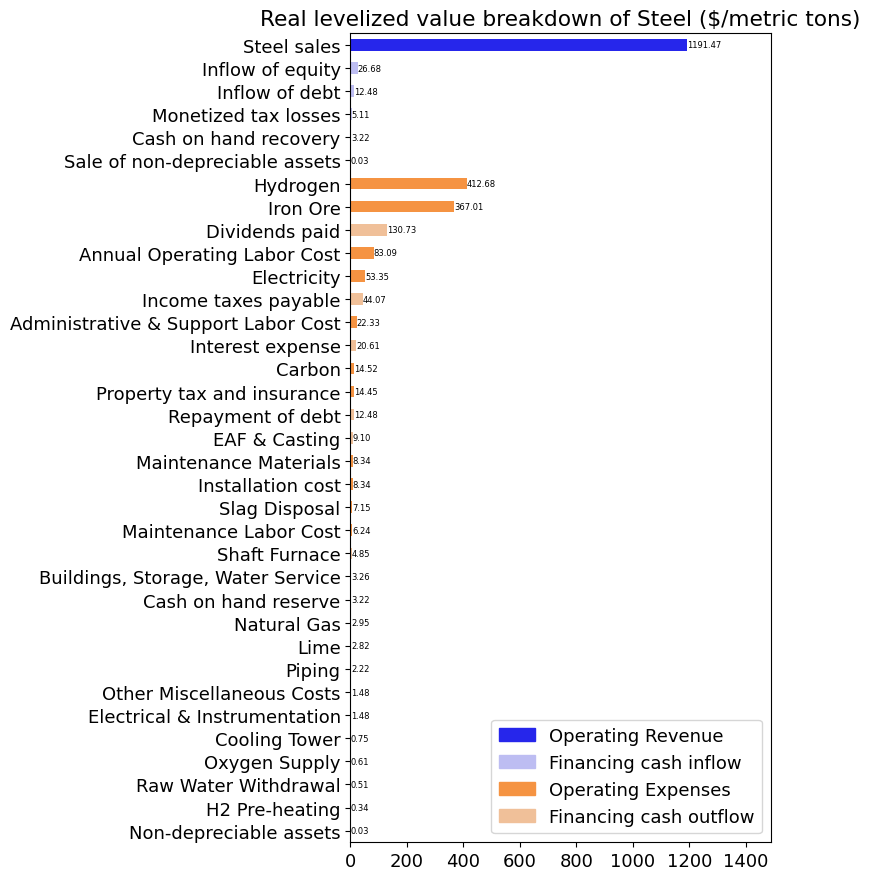

In [ ]:
prob, config = run_greenheart(config, run_only=True)

### Inspect outputs and generate plots

We can easily get relavant outputs from H2Integrate, such as LCOE, LCOH, and LCOS for this example.

In [ ]:
lcoe = prob.get_val("lcoe", units="USD/(MW*h)")
lcoh = prob.get_val("lcoh", units="USD/kg")
lcos = prob.get_val("lcos", units="USD/t")

print("LCOE: ", lcoe, "[$/MWh]")
print("LCOH: ", lcoh, "[$/kg]")
print("LCOS: ", lcos, "[$/metric-tonne]")

LCOE:  [62.45494671] [$/MWh]
LCOH:  [6.25644676] [$/kg]
LCOS:  [1191.47347326] [$/metric-tonne]


We can also generate plots using built-in functions from H2Integrate.

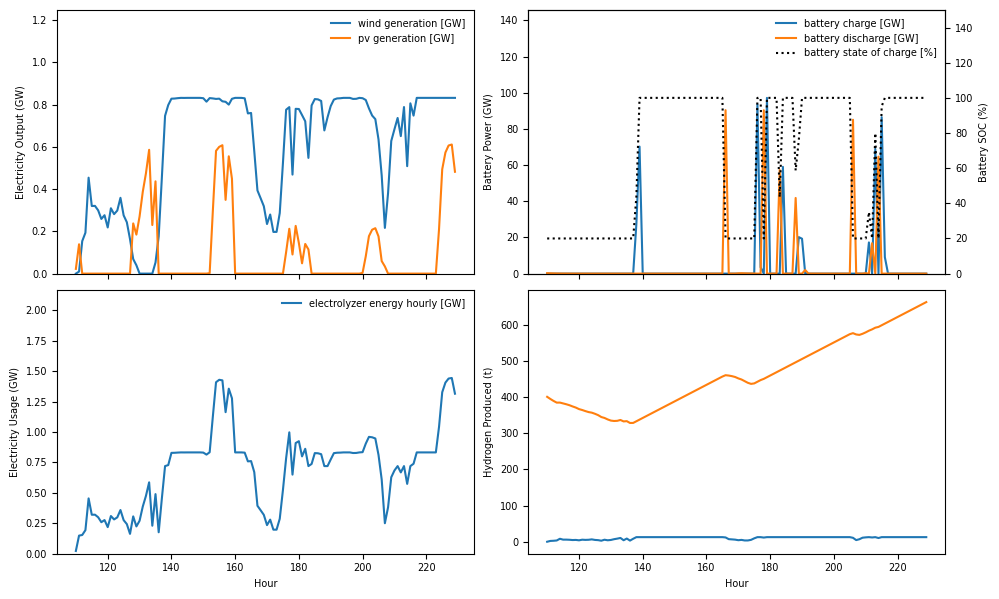

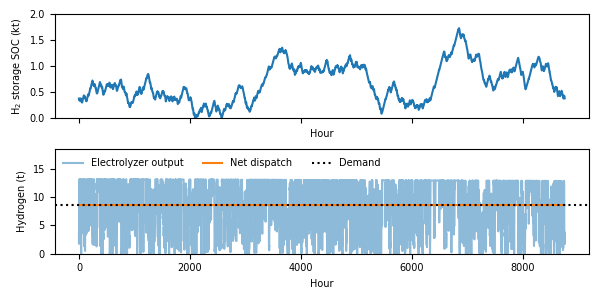

In [ ]:
plot_energy_flows("./output/data/production/energy_flows.csv", show_fig=True)
plot_hydrogen_flows("./output/data/production/energy_flows.csv", show_fig=True)